In [1]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Step 2: Load the MNIST dataset
# It comes preloaded with Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

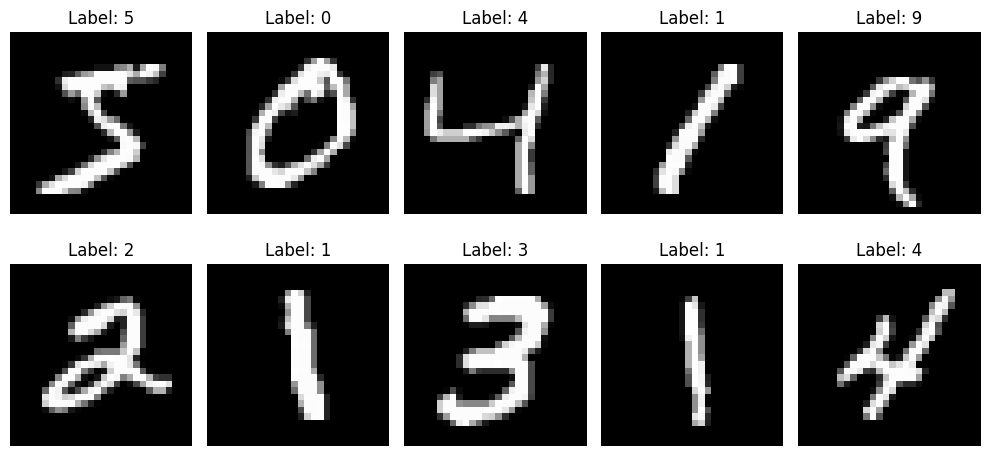

In [3]:
# Step 3: Visualize the first few images
# This helps to understand the dataset better
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# Step 4: Normalize the image data
# Pixel values range from 0 to 255, so divide by 255 to get values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# Step 5: Reshape the data for CNN (if we use Conv layers later)
# CNN expects input shape of (28, 28, 1), where 1 is the number of channels (grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [6]:
# Step 6: Convert labels to one-hot encoded format
# For example, label 3 becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Testing different models to compare their performance.

We’ll try these 3 models:

A Simple Neural Network (Dense only)

A Convolutional Neural Network (CNN)

A slightly Deeper CNN for better accuracy

We’ll train each for a few epochs to get a quick comparison, then choose the best one.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Create a function to compile and train any model
def train_model(model, name, epochs=5):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    print(f"\nTraining: {name}")
    history = model.fit(x_train, y_train_cat, epochs=epochs,
                        validation_data=(x_test, y_test_cat), verbose=2)
    print(f"{name} Test Accuracy: {model.evaluate(x_test, y_test_cat, verbose=0)[1]*100:.2f}%")
    return model, history

In [8]:
# Model 1: Simple Neural Network (Dense only)
model_dense = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Model 2: Basic CNN
model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Model 3: Deeper CNN with Dropout
model_deepcnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train and evaluate each model
model_dense, _ = train_model(model_dense, "Dense Only NN")
model_cnn, _ = train_model(model_cnn, "Basic CNN")
model_deepcnn, _ = train_model(model_deepcnn, "Deeper CNN with Dropout")


Training: Dense Only NN
Epoch 1/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9275 - loss: 0.2567 - val_accuracy: 0.9608 - val_loss: 0.1349
Epoch 2/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9670 - loss: 0.1146 - val_accuracy: 0.9697 - val_loss: 0.0983
Epoch 3/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9770 - loss: 0.0781 - val_accuracy: 0.9724 - val_loss: 0.0917
Epoch 4/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9819 - loss: 0.0591 - val_accuracy: 0.9739 - val_loss: 0.0824
Epoch 5/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9865 - loss: 0.0454 - val_accuracy: 0.9744 - val_loss: 0.0772
Dense Only NN Test Accuracy: 97.44%

Training: Basic CNN
Epoch 1/5
1875/1875 - 32s - 17ms/step - accuracy: 0.9498 - loss: 0.1693 - val_accuracy: 0.9816 - val_loss: 0.0639
Epoch 2/5
1875/1875 - 41s - 22ms/step - accuracy: 0.9826 - loss: 0.0572 - val_accuracy: 0.9841 - val_loss: 0.0493
Epoch 3/5
1875/1875 - 30s - 16ms/step - accuracy: 0.9882 - loss: 0.0389 - val_accuracy: 0.9834 - val_loss: 0.0449
Epoch 4/5
1875/

In [11]:
# Save the best model to a file
model_deepcnn.save("mnist_digit_classifier.keras")

# Check if the model file exists
import os
print("Model saved:", os.path.exists("mnist_digit_classifier.keras"))


Model saved: True


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


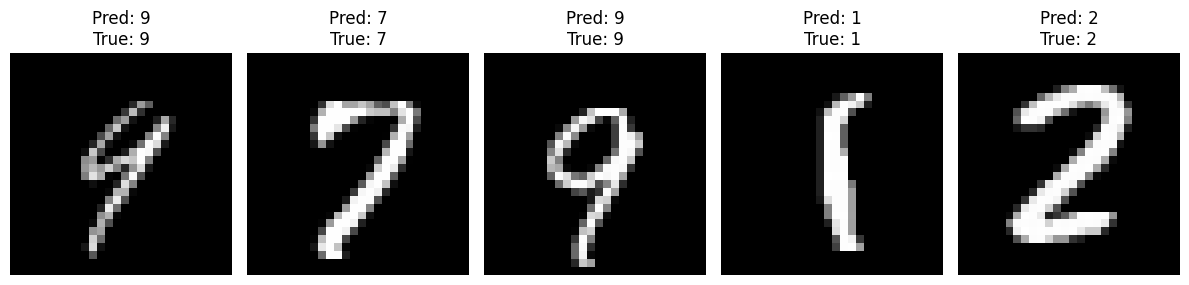

In [12]:
from tensorflow.keras.models import load_model
import random

# Step 1: Load the saved model
model = load_model("mnist_digit_classifier.keras")

# Step 2: Pick some random images from the test set
num_images = 5
indices = random.sample(range(len(x_test)), num_images)
sample_images = x_test[indices]
sample_labels = y_test[indices]

# Step 3: Make predictions
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# Step 4: Plot the images with predicted and true labels
plt.figure(figsize=(12, 4))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {sample_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [13]:
# Save a few test images as files for Streamlit testing
from PIL import Image

for i in range(5):
    img = (x_test[i].reshape(28, 28) * 255).astype("uint8")  # Scale back to 0–255
    im = Image.fromarray(img)
    im.save(f"digit_{y_test[i]}_{i}.png")


In [14]:
from google.colab import files
for i in range(5):
    files.download(f"digit_{y_test[i]}_{i}.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>